In [1]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
import pandas as pd
import seaborn as sns

In [3]:
PATH='/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/dacon_energy'

In [4]:
train = pd.read_csv(PATH + '/train.csv', encoding='cp949', header=0)
mis_test = pd.read_csv(PATH + '/test.csv', encoding='cp949', header=0)
sub = pd.read_csv(PATH + '/sample_submission.csv', encoding='cp949')

In [5]:
train.columns = ['num','datetime','power(kWh)','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']
mis_test.columns = ['num','datetime','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']

In [6]:
def time(x):
    return int(x[-2:])

train['time']=train['datetime'].apply(lambda x: time(x))
mis_test['time']=mis_test['datetime'].apply(lambda x: time(x))

# weekday() 함수 : 요일 반환 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
def weekday(x):
    return pd.to_datetime(x[:10]).weekday()

train['weekday']=train['datetime'].apply(lambda x :weekday(x))
mis_test['weekday']=mis_test['datetime'].apply(lambda x :weekday(x))

#시계열 정규화

- **평균, 표준편차 기반**
 - (x(t)-m)/std
 - 정규화된 시계열은 평균값 0, 표준편차 1

-  **최대, 최소 기반**
 - x(t)/(max-min)
 - 정규화된 시계열 최대값 0.5, 최소값 -0.5 


In [7]:
w_tr=train[['num','weekday','power(kWh)']]
w_tr=w_tr.pivot_table('power(kWh)','num','weekday')

w_tr.head()

weekday,0,1,2,3,4,5,6
num,,,,,,,
1,8541.545538,8507.432250,8551.757250,8561.101500,8570.308500,8543.843125,8527.070250
2,1373.904346,1383.035625,1389.466125,1402.357500,1390.788000,1093.347000,1060.336125
3,3371.143240,3371.748507,3398.873622,3406.395846,3402.517822,3340.100728,3308.713665
4,684.863829,678.183456,727.799464,794.561580,825.467101,877.090723,766.609781
5,2720.551846,2703.939000,2698.137000,2685.795000,2838.414000,2744.958000,2609.269500


In [8]:
for i in range(1,61):
  w_trm=w_tr.loc[i,:].mean()
  w_trs=w_tr.loc[i,:].std()
  
  w_tr.loc[i,:]=(w_tr.loc[i,:]-w_trm)/w_trs #평균,표준편차 기반 정규화

In [9]:
t_tr=train[['num','time','power(kWh)']]
t_tr=t_tr.pivot_table('power(kWh)','num','time')

t_tr.head()

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
num,,,,,,,,,,,,,,,,,,,,,
1,8540.373176,8517.174776,8509.055718,8493.313129,8479.522165,8454.715200,8446.512282,8475.374965,8488.357835,8530.401600,...,8600.431341,8606.705506,8607.193412,8597.191341,8580.187906,8581.646965,8572.918024,8573.062871,8573.848094,8553.645741
2,1016.083059,1006.713741,1003.755812,997.378729,995.259388,1001.792753,1101.855388,1292.085318,1533.377647,1612.780518,...,1612.163012,1598.638871,1578.684282,1520.958918,1344.230259,1197.686965,1128.065082,1087.279200,1048.265788,1029.866400
3,3383.537538,3389.803091,3384.955357,3398.769413,3400.737798,3398.592240,3419.014448,3440.898050,3447.141307,3383.417523,...,3339.620075,3388.781191,3399.378719,3397.013452,3357.859302,3326.849488,3321.474264,3310.769842,3310.322347,3423.915389
4,390.832518,358.194071,340.319435,324.729790,308.569412,301.470020,303.231388,317.842489,668.980460,976.026570,...,1342.630588,1370.918965,1340.840287,1222.466994,939.888784,775.130109,601.744276,506.216200,419.447133,435.779153
5,2950.931012,2904.290259,2888.372329,2876.972612,2866.116706,2419.154259,2202.463059,2128.926494,2406.641506,2578.425035,...,2645.913600,2665.561976,2587.059953,2536.200847,2342.090541,2810.038024,3119.609224,3102.319059,3054.992188,3003.314824


In [10]:
for i in range(1,61):
  t_trm=t_tr.loc[i,:].mean()
  t_trs=t_tr.loc[i,:].std()
  
  t_tr.loc[i,:]=(t_tr.loc[i,:]-t_trm)/t_trs
  


In [11]:
#최적 클러스터 수 찾기
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.2 MB/s 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


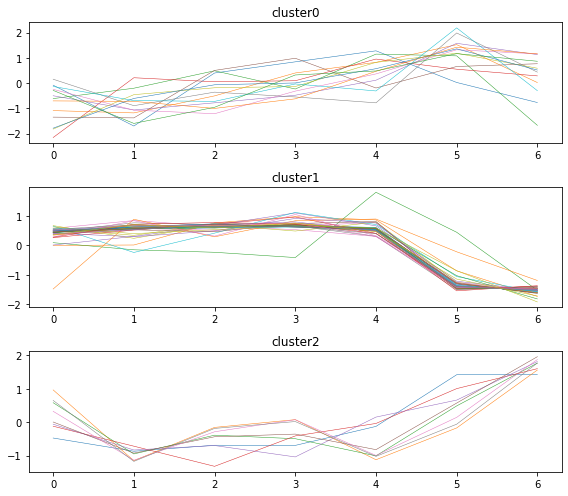

In [12]:
#Euclidean
#요일별
#군집화
from matplotlib import pyplot as plt
from tslearn.clustering import TimeSeriesKMeans #모듈 import

E_model= TimeSeriesKMeans(n_clusters=3,metric='euclidean',random_state=8) #요일 클러스터수=3
E_result=E_model.fit_predict(w_tr)

w_tr['cluster']=E_result

max=w_tr['cluster'].max()
fig,ax=plt.subplots(max+1,1,figsize=(8,7))

for i in range(0,max+1):
  E_cluster=w_tr[w_tr['cluster']==i]
  E_cluster.drop(['cluster'],axis=1,inplace=True)
  ax[i].plot(E_cluster.T,linewidth=0.5)
  ax[i].set_title(f'cluster{i}')
  
  plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


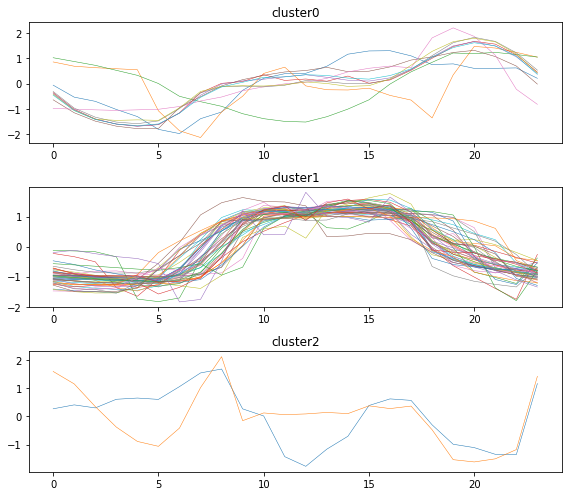

In [13]:
#Euclidean
#시간별
#군집화

E_model= TimeSeriesKMeans(n_clusters=3,metric='euclidean',n_init=10,random_state=2) #시간 클러스터수=3
E_result=E_model.fit_predict(t_tr)

t_tr['cluster']=E_result

max=t_tr['cluster'].max()
fig,ax=plt.subplots(max+1,1,figsize=(8,7))

for i in range(0,max+1):
  
  E_cluster=t_tr[t_tr['cluster']==i]
  E_cluster.drop(['cluster'],axis=1,inplace=True)
  ax[i].plot(E_cluster.T,linewidth=0.5)
  ax[i].set_title(f'cluster{i}')
  plt.tight_layout()

  plt.tight_layout()
  

plt.show()

In [14]:
clusters=pd.concat([w_tr['cluster'],t_tr['cluster']],axis=1,ignore_index=True)
clusters.columns=['week_cluster','time_cluster']
clusters.head()

,week_cluster,time_cluster
num,,
1,0,0
2,1,1
3,1,2
4,0,1
5,1,0


In [15]:
clusters['cluster'] = 0
for i in range(1,len(clusters)+1):

  if clusters['week_cluster'][i]==1:
    if clusters['time_cluster'][i]==1:
      clusters['cluster'][i]=1
    elif clusters['time_cluster'][i]==2:
      clusters['cluster'][i]=2
  elif clusters['week_cluster'][i]==2:
     if clusters['time_cluster'][i]==1:
       clusters['cluster'][i]=3
     elif clusters['time_cluster'][i]==2:
       clusters['cluster'][i]=4
  else:
     clusters['cluster'][i]==0         


In [16]:
clusters.head(5)

,week_cluster,time_cluster,cluster
num,,,
1,0,0,0
2,1,1,1
3,1,2,2
4,0,1,0
5,1,0,0


In [17]:
#  최종데이터
train = pd.merge(train,clusters[['cluster']], on = 'num', how = 'inner')

In [18]:
train.head()

,num,datetime,power(kWh),tempe(°C),wind(m/s),hum(%),rain(mm),sol(hr),ne_cool,sol_energy,time,weekday,cluster
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,0


In [19]:
from collections import Counter
Counter(train['cluster'])

Counter({0: 40800, 1: 71400, 2: 4080, 3: 6120})

# 상관분석

In [20]:
import matplotlib.font_manager as fm
path = "/content/gdrive/MyDrive/font/NanumGothic.ttf"
fontprop = fm.FontProperties(fname = path, size = 10)

In [21]:
# 클러스터
cluster_0 = train[train['cluster'] == 0]
cluster_1 = train[train['cluster'] == 1]
cluster_2 = train[train['cluster'] == 2]
cluster_3 = train[train['cluster'] == 3]

In [22]:
pd.unique(cluster_0['num'])

array([ 1,  4,  5,  9, 10, 12, 19, 20, 21, 28, 29, 34, 40, 41, 42, 49, 50,
       51, 59, 60])

In [27]:
def Corr_cluster(cluster_df):
  for i in pd.unique(cluster_df['num']):
    heatmap_data = list(train.groupby("num"))
    heatmap_data_result = heatmap_data[i-1][1][['power(kWh)','tempe(°C)','wind(m/s)', 'hum(%)', 'rain(mm)', 'sol(hr)']]
    colormap = plt.cm.PuBu 
    plt.figure(figsize=(10, 10)) 
    plt.title("건물 번호 : {} / Person Correlation of Features".format(i), y = 1.05, size = 15, fontproperties = fontprop) 
    sns.heatmap(heatmap_data_result.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

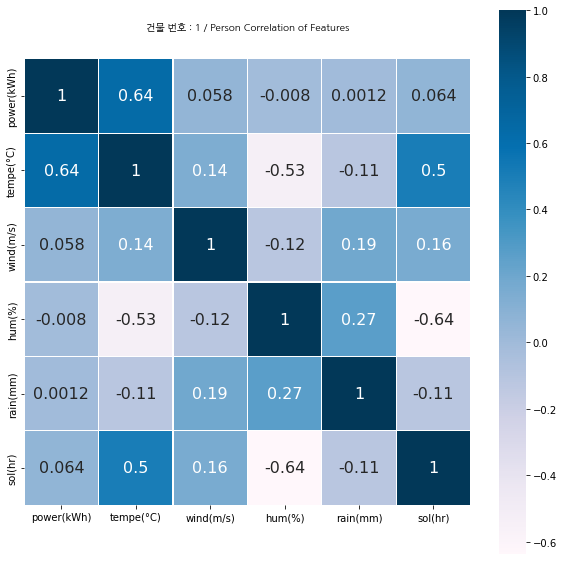

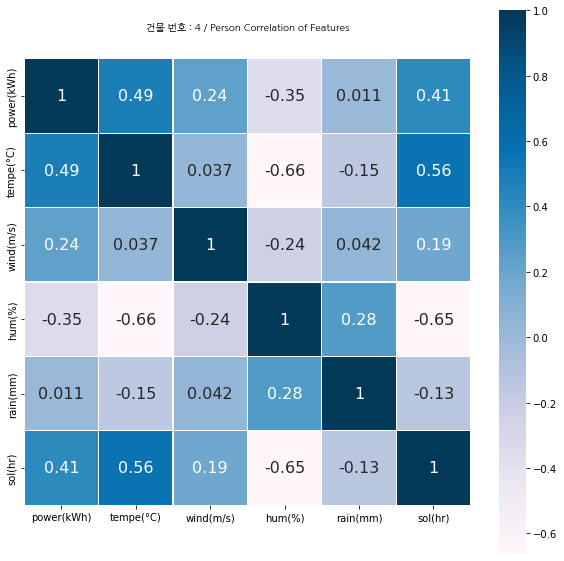

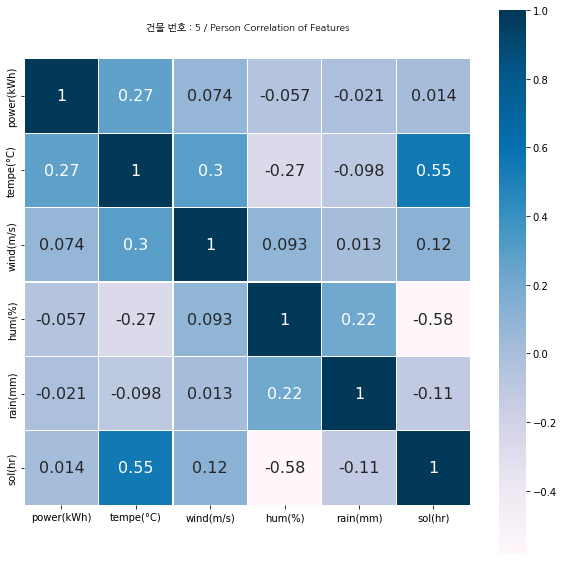

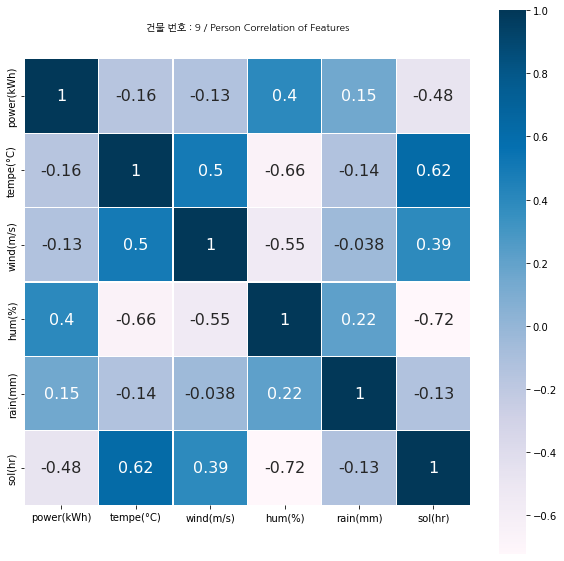

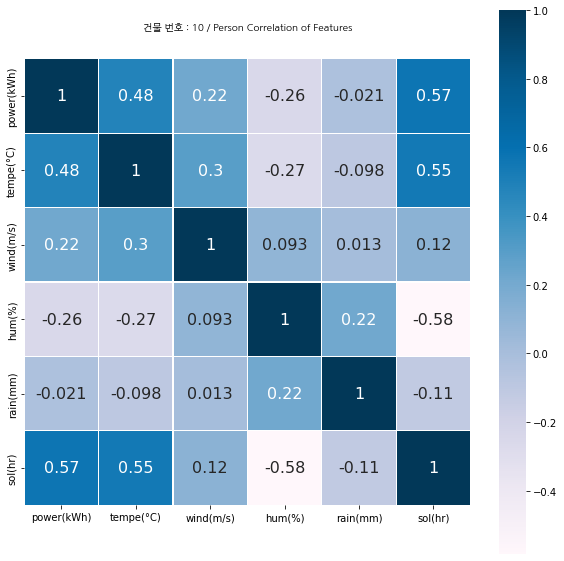

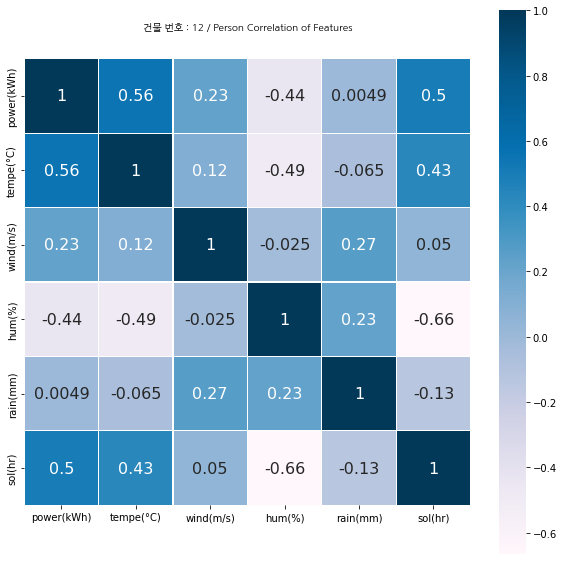

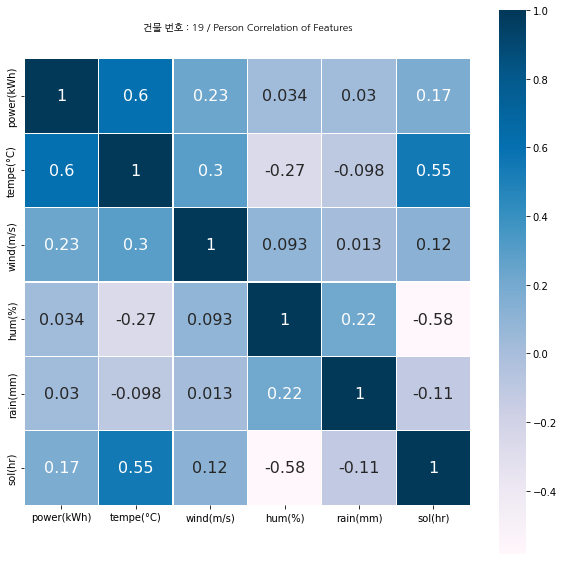

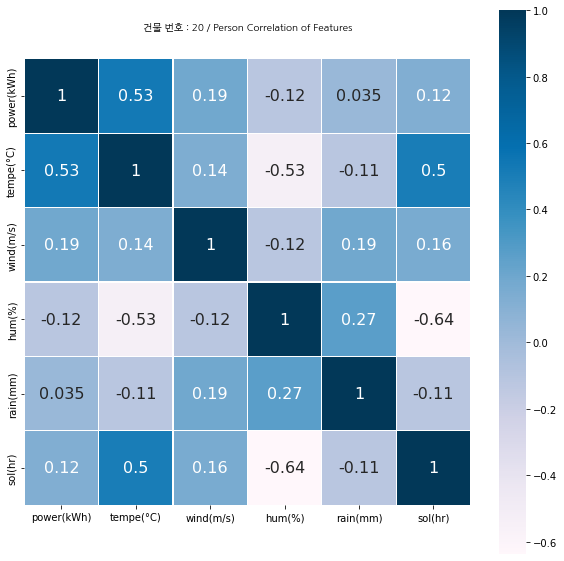

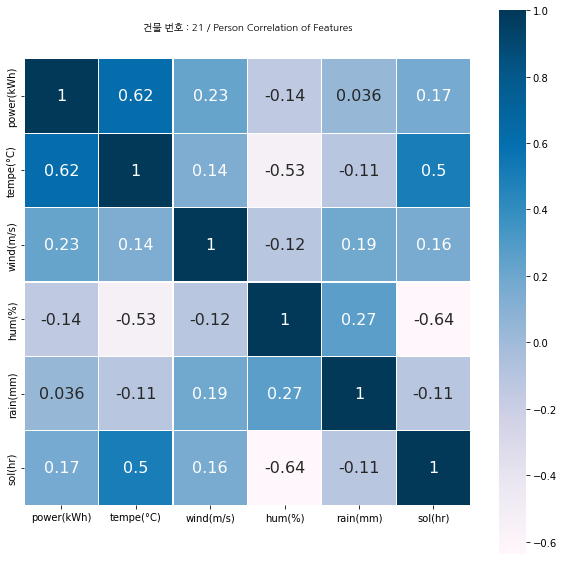

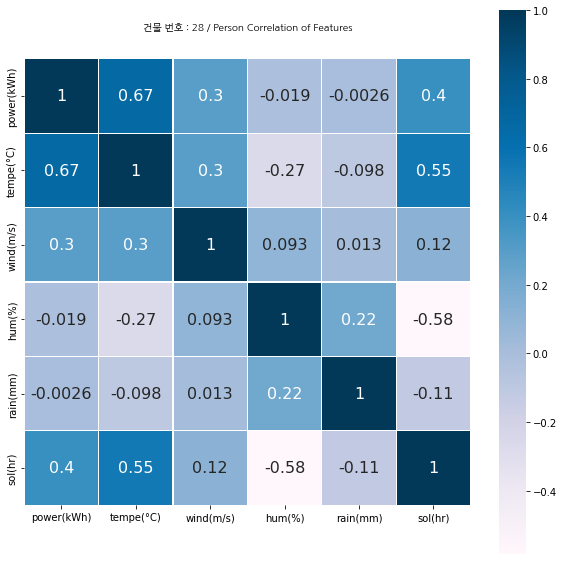

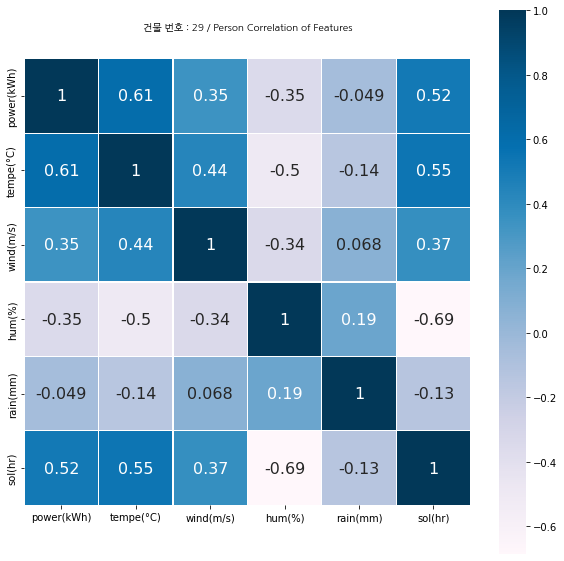

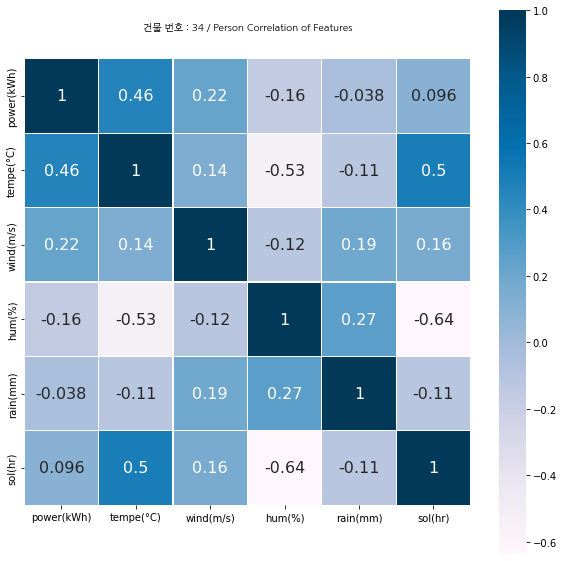

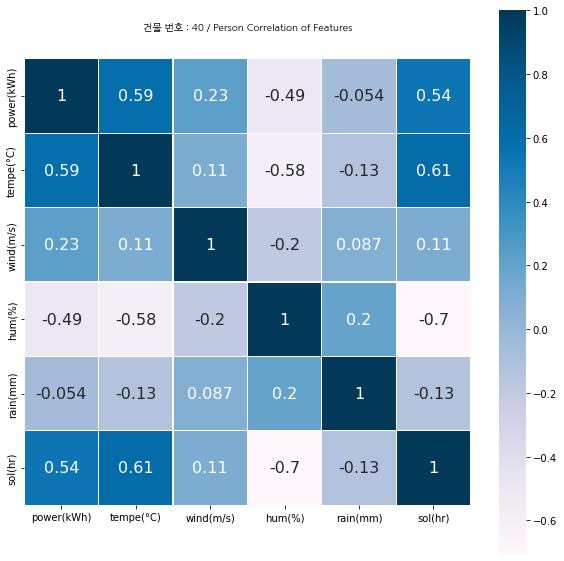

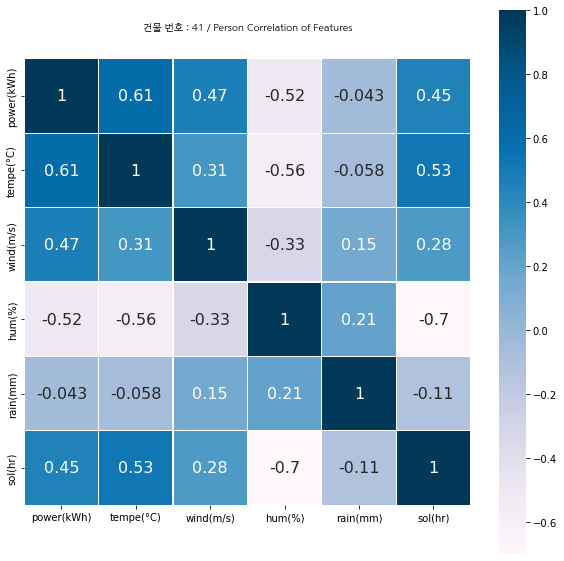

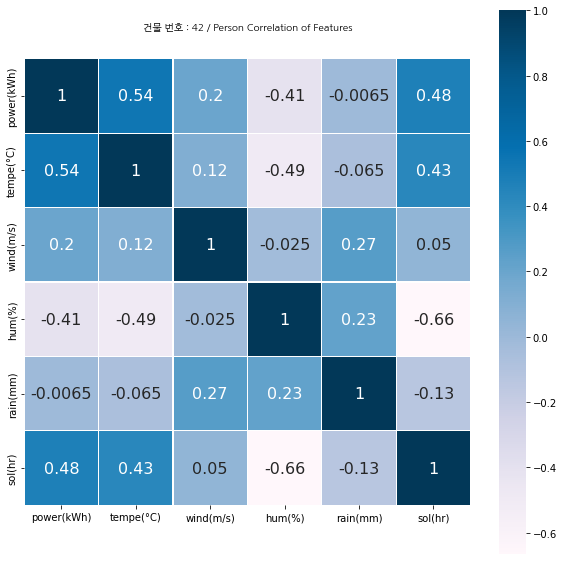

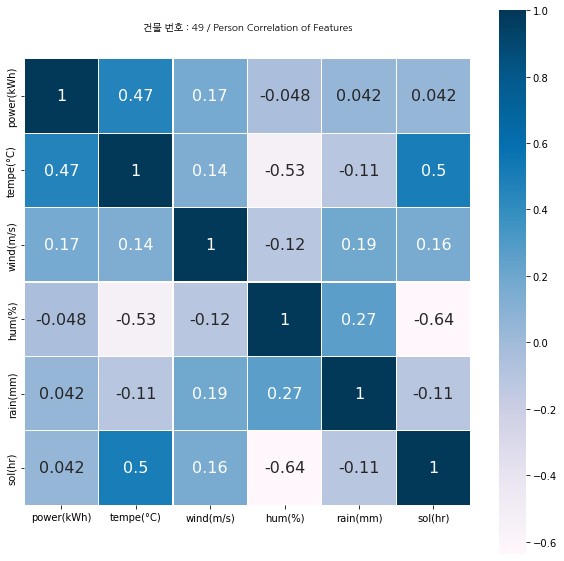

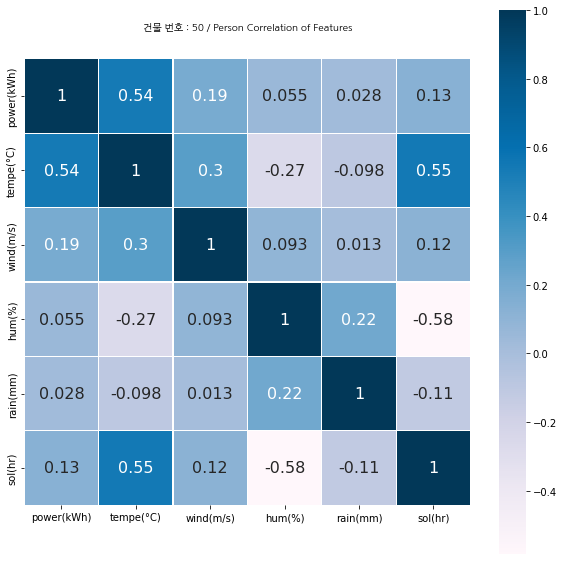

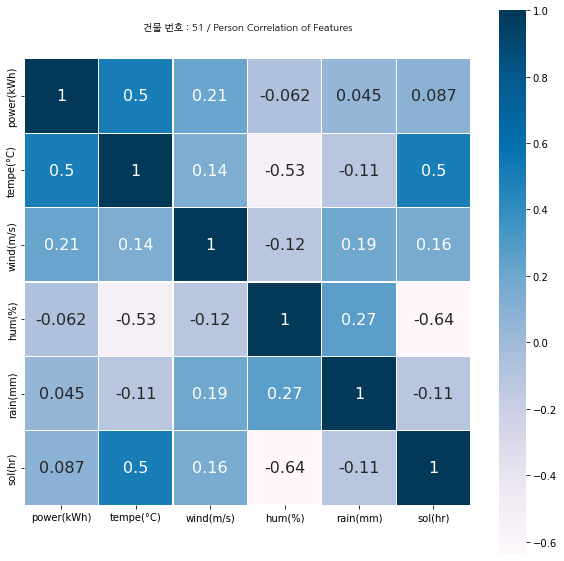

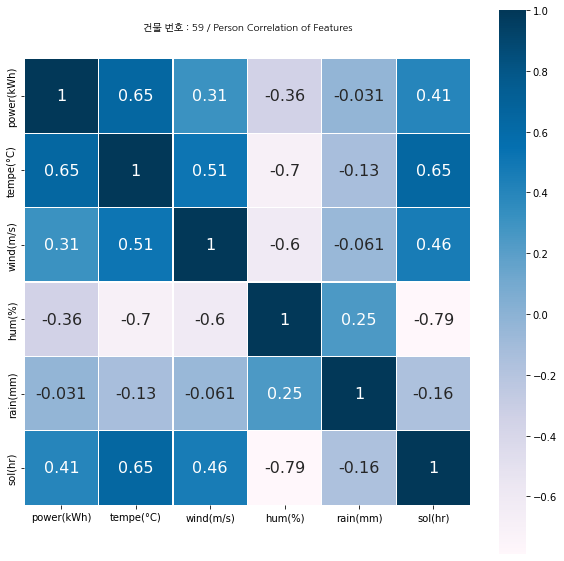

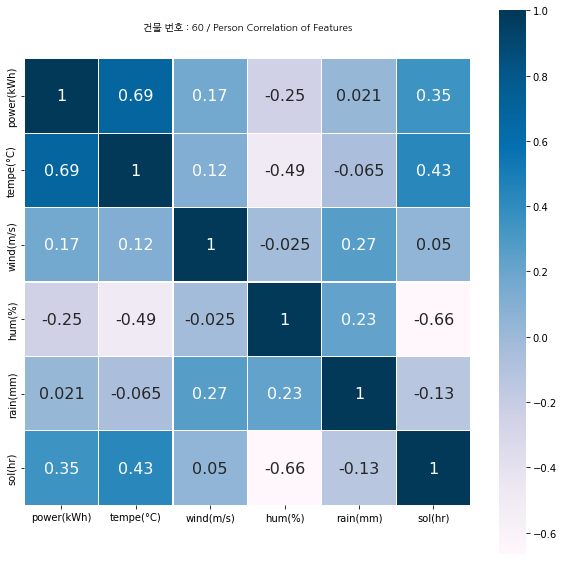

In [28]:
Corr_cluster(cluster_0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


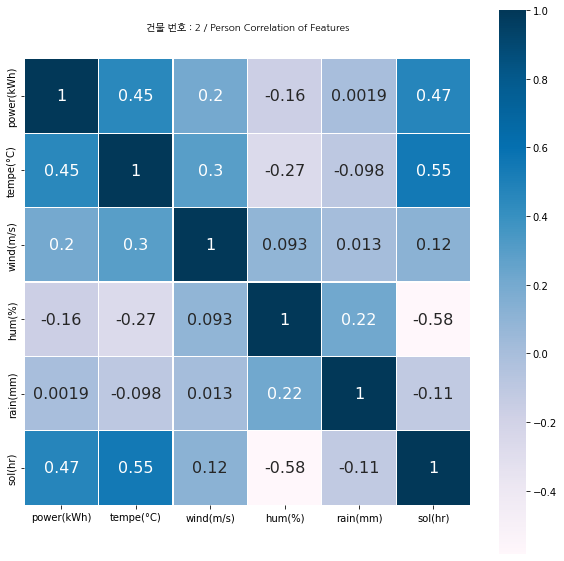

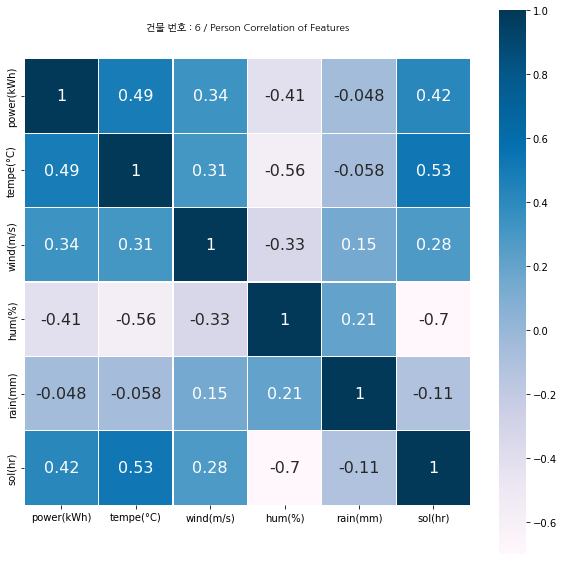

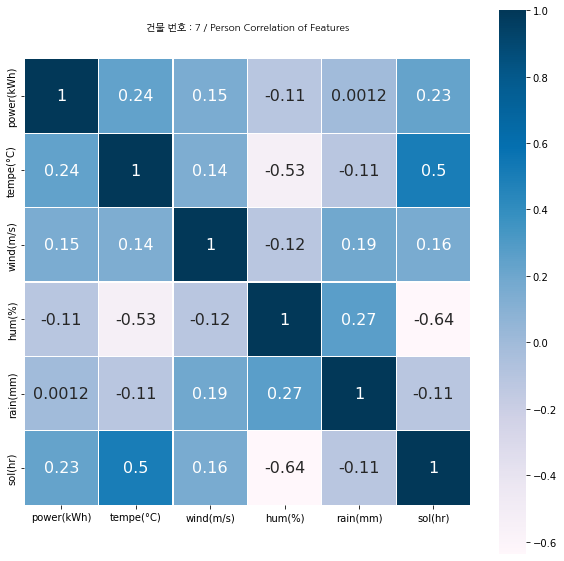

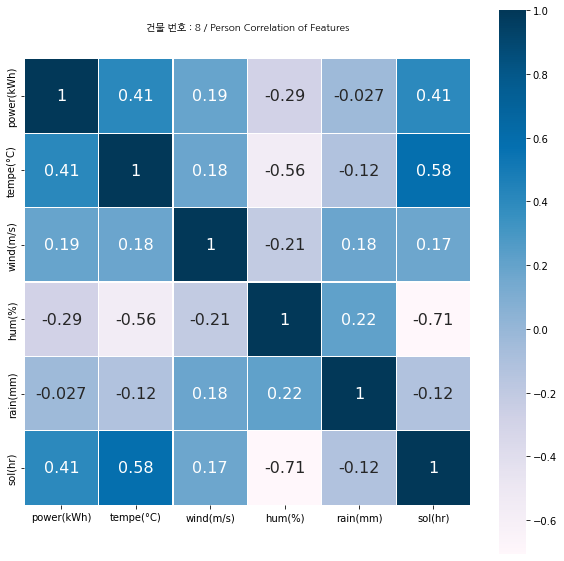

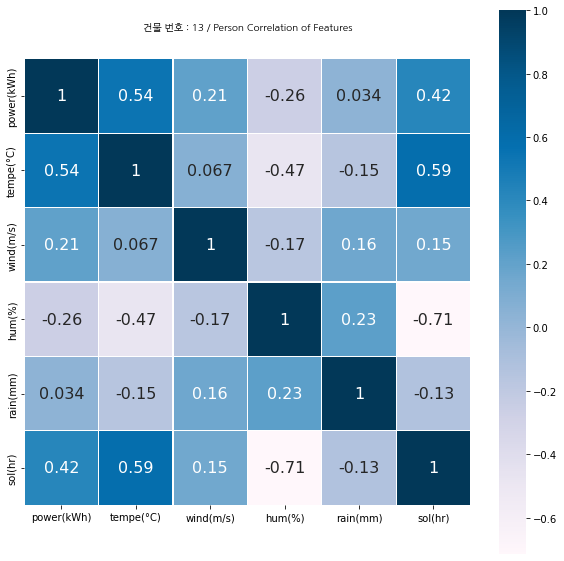

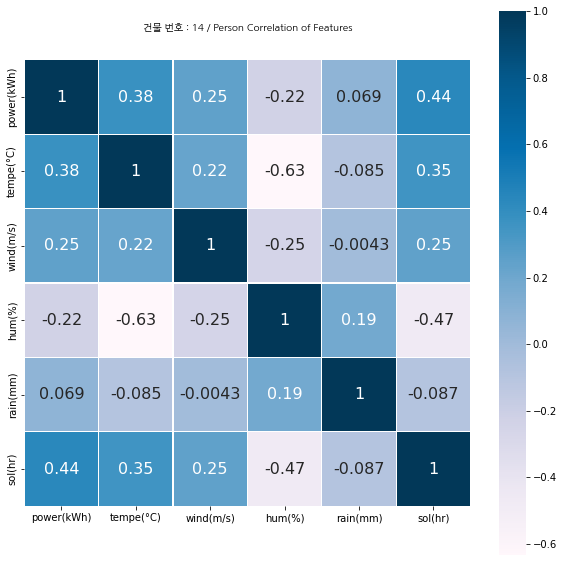

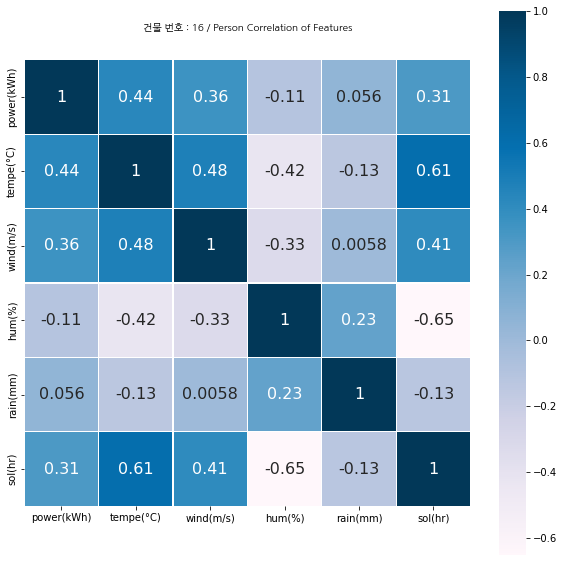

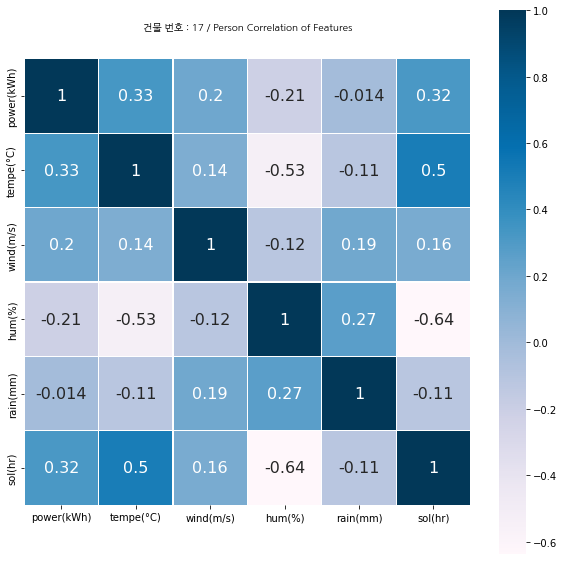

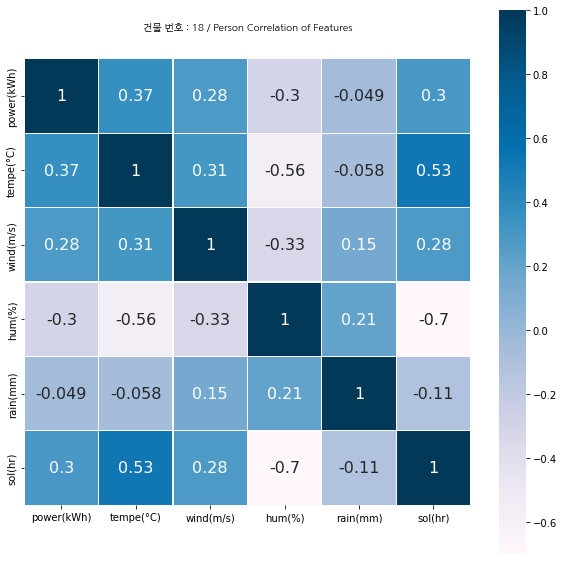

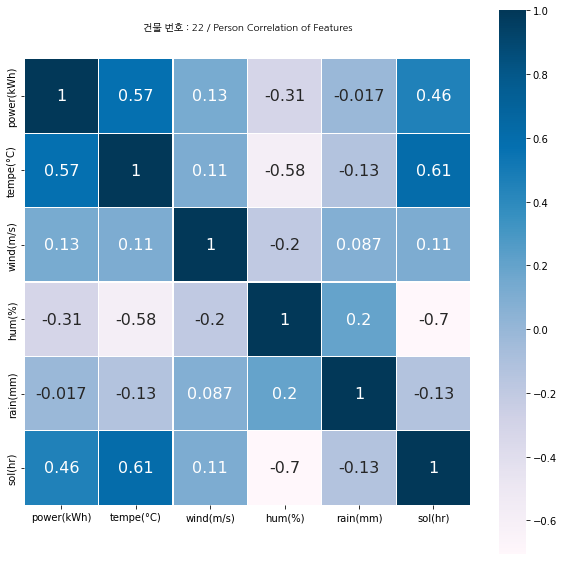

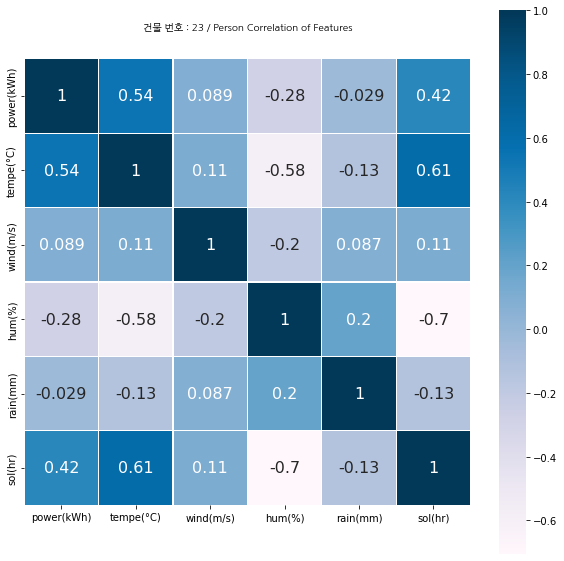

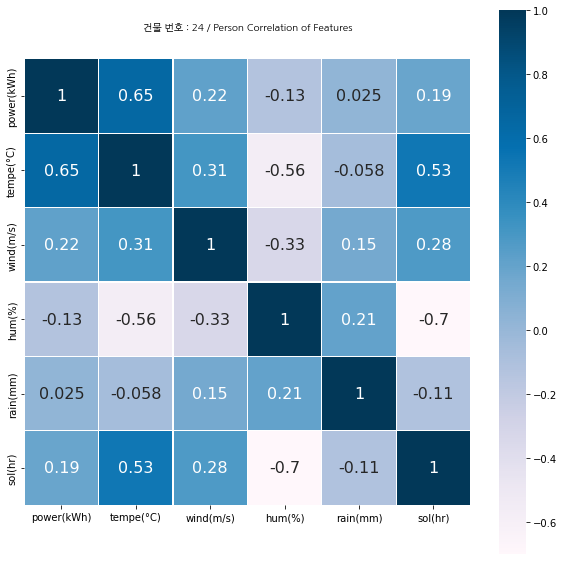

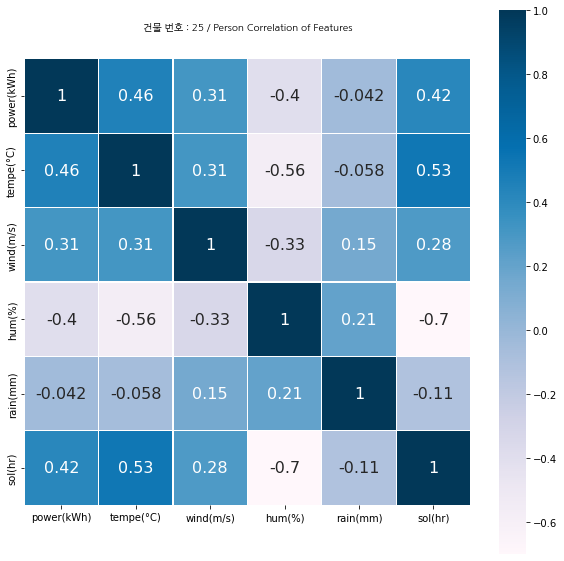

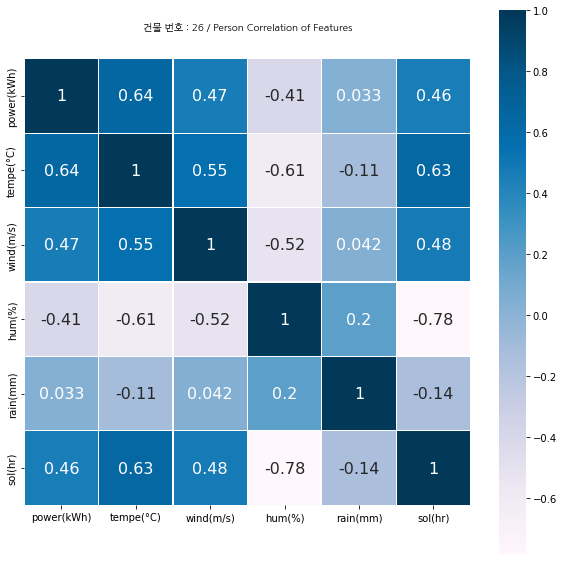

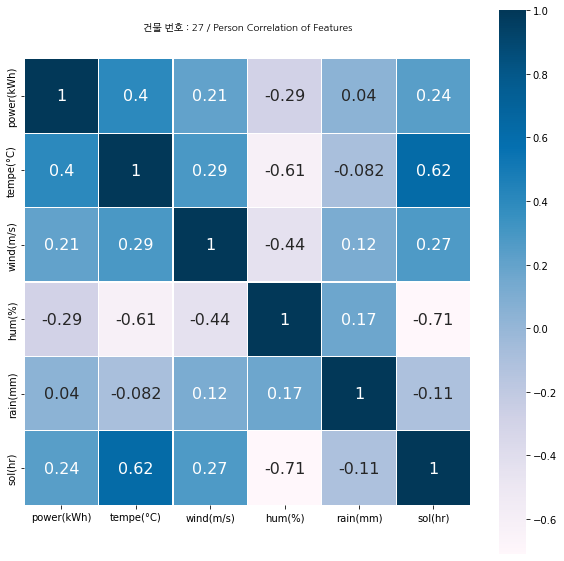

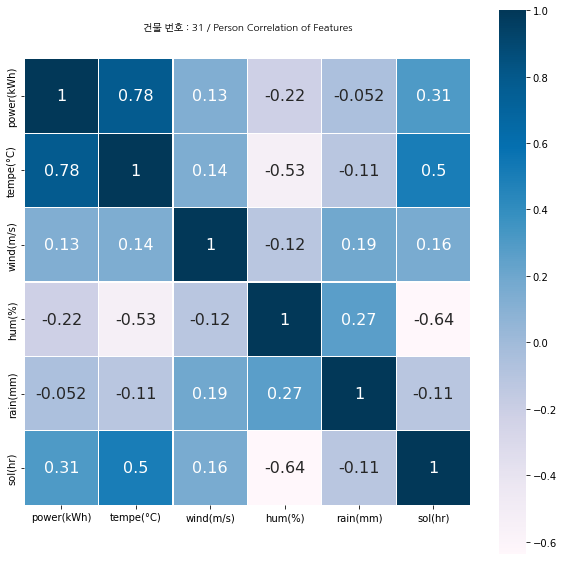

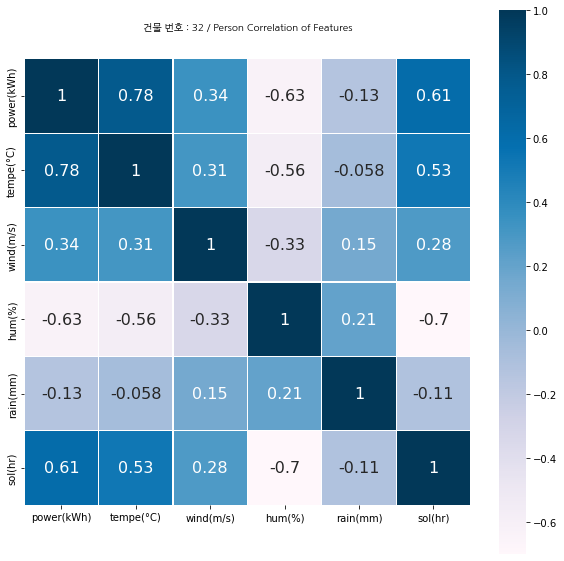

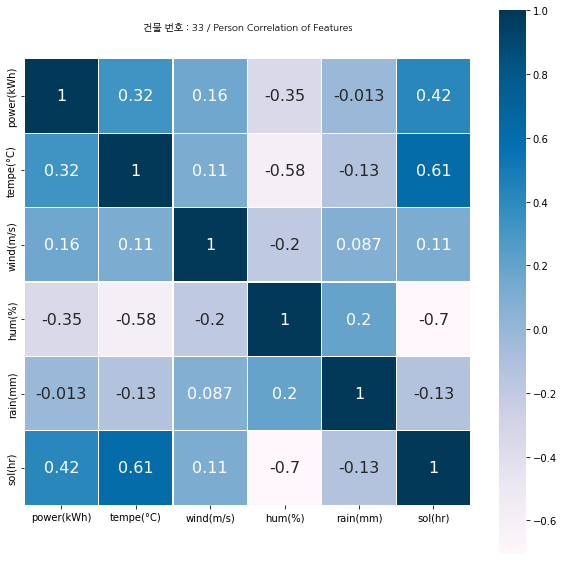

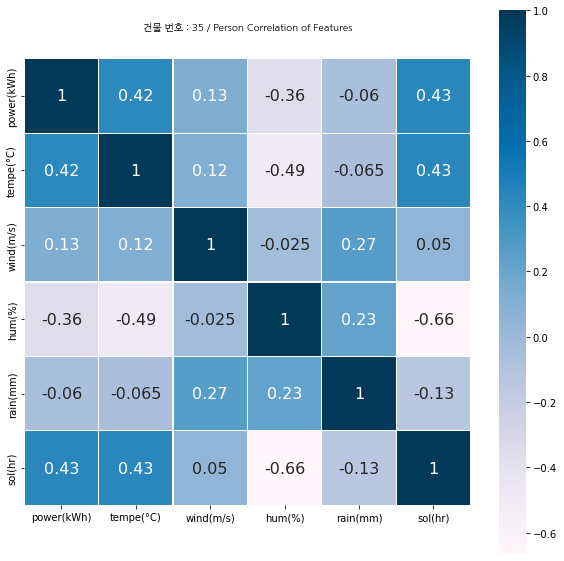

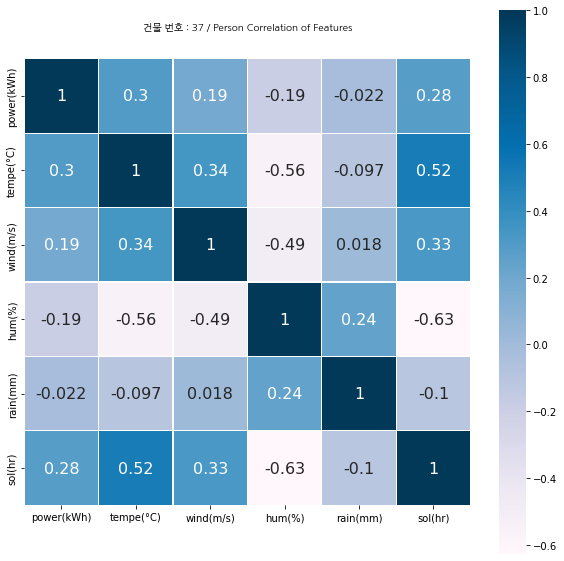

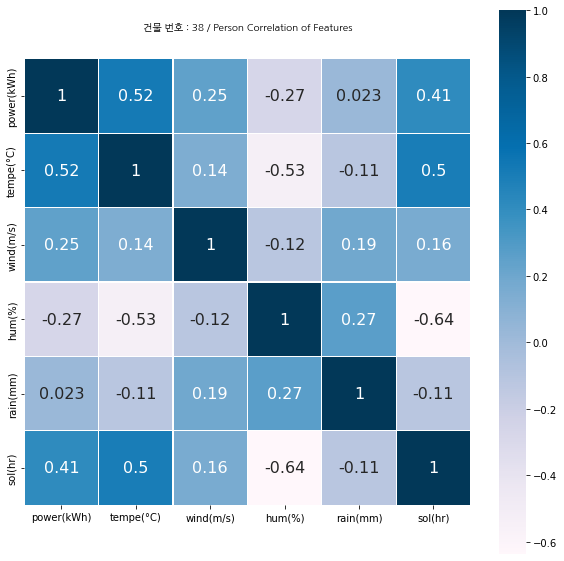

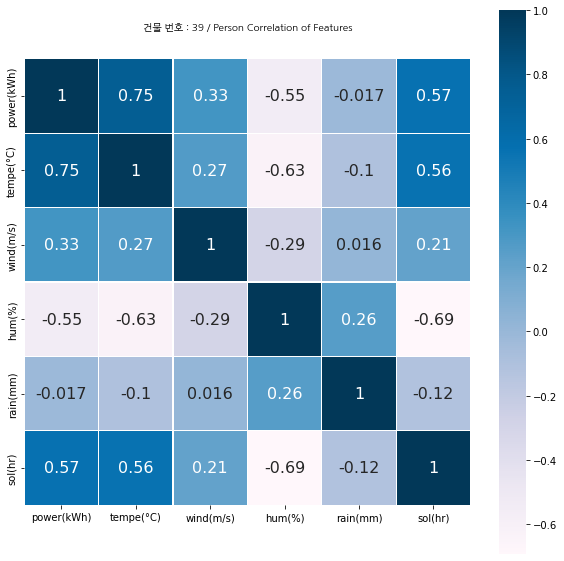

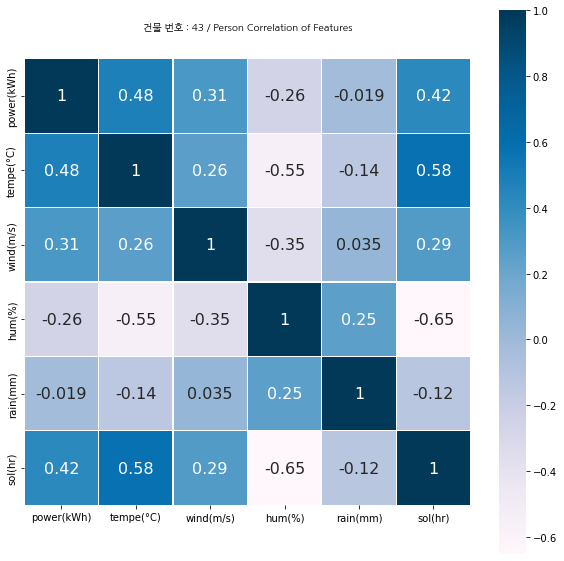

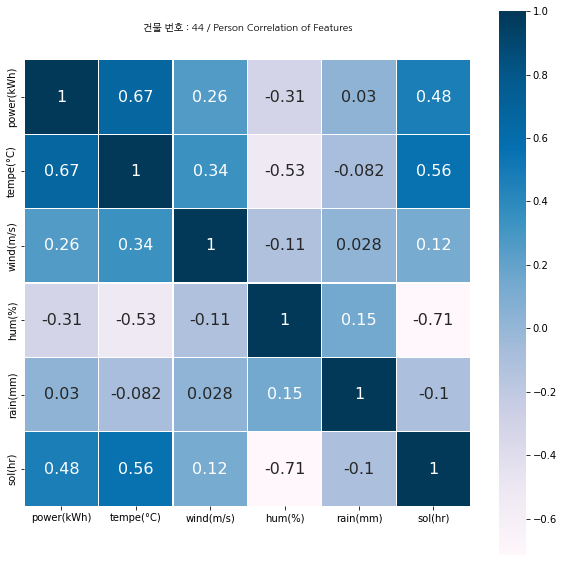

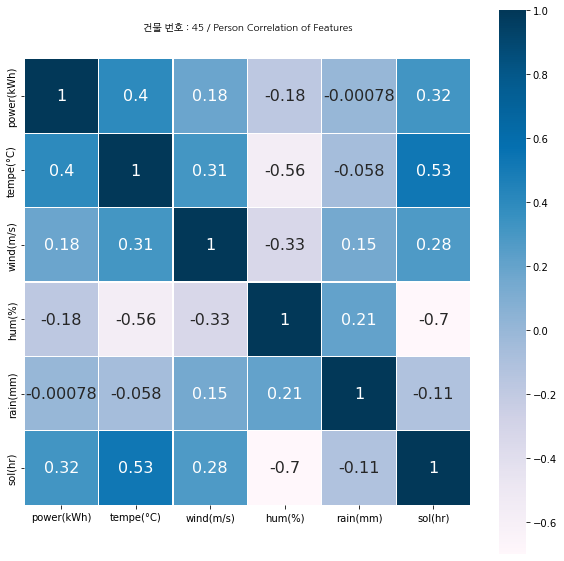

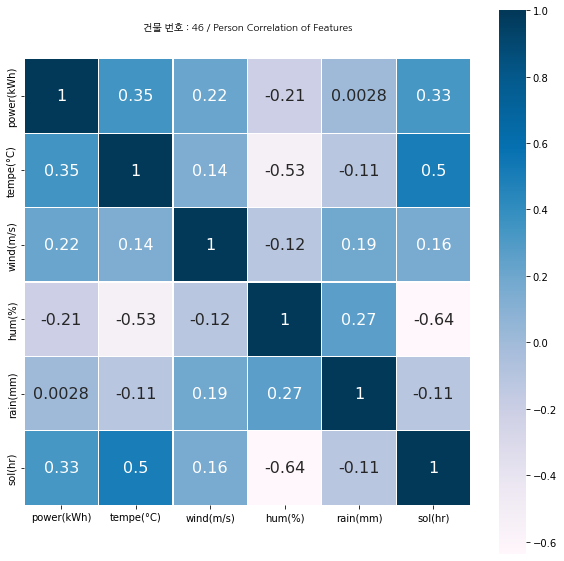

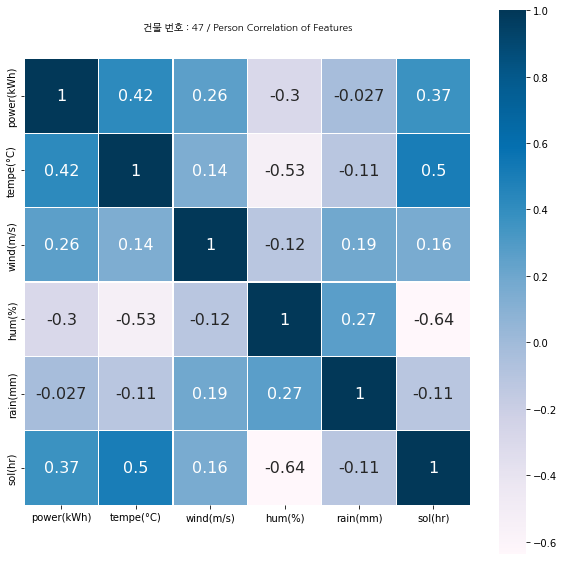

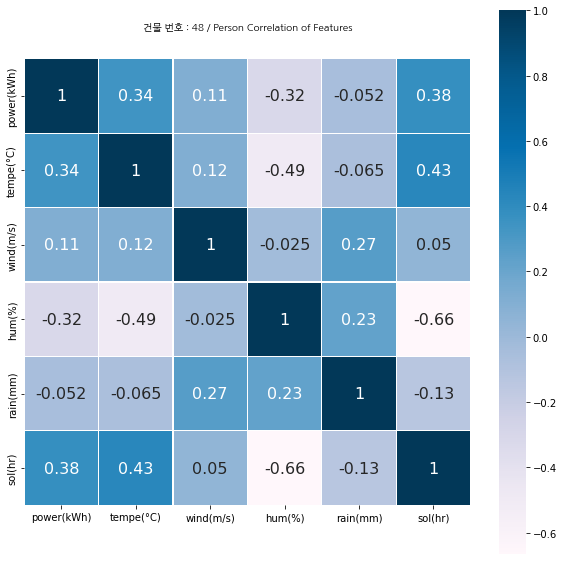

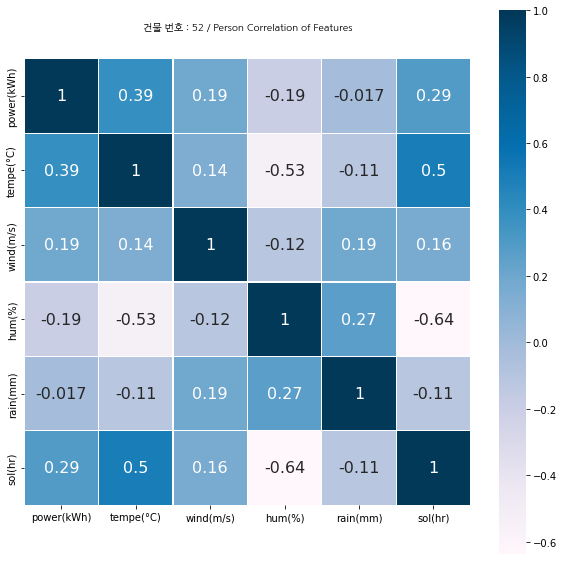

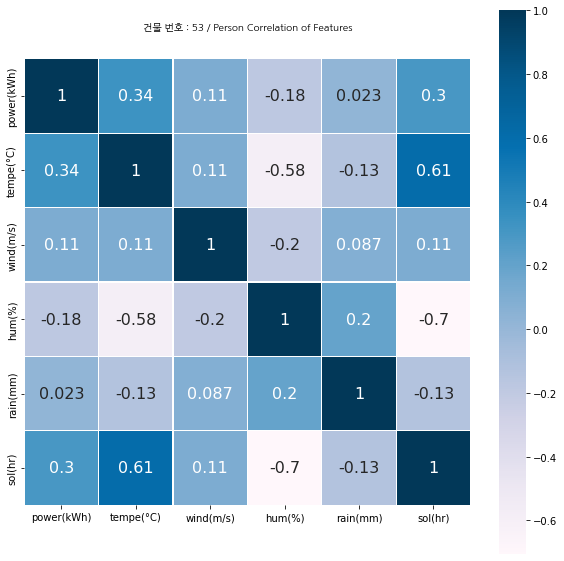

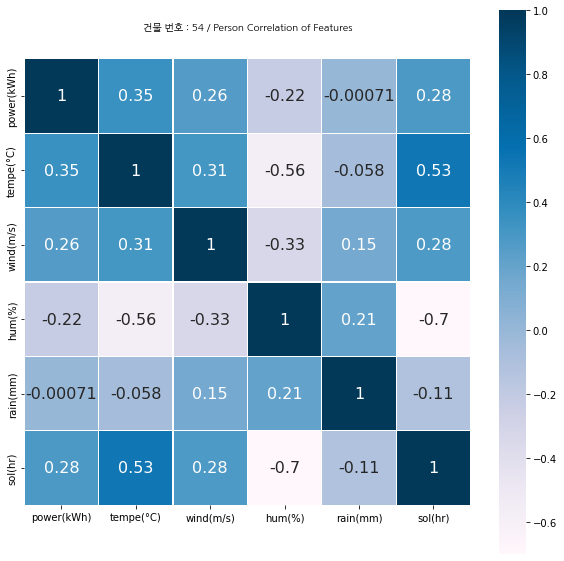

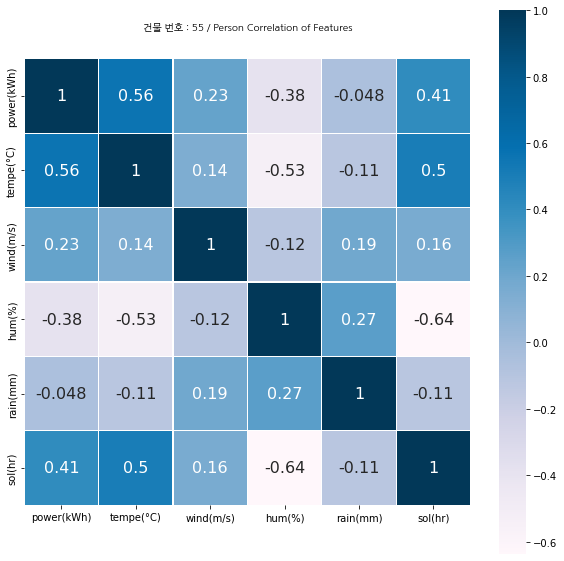

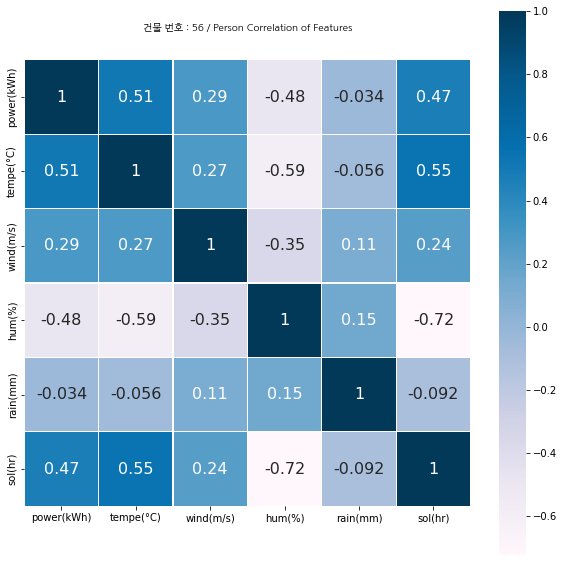

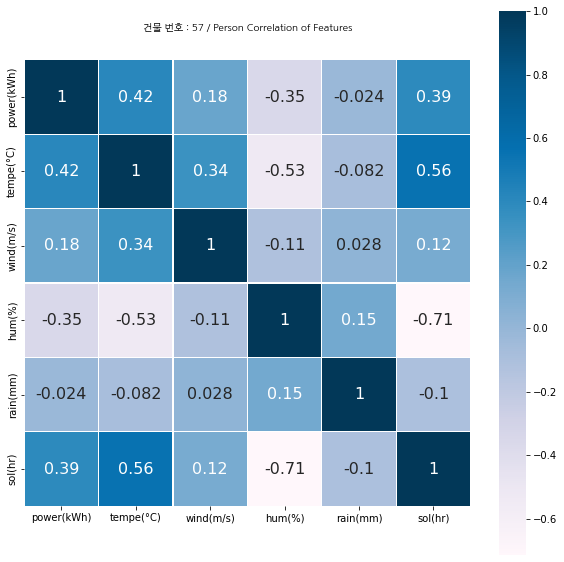

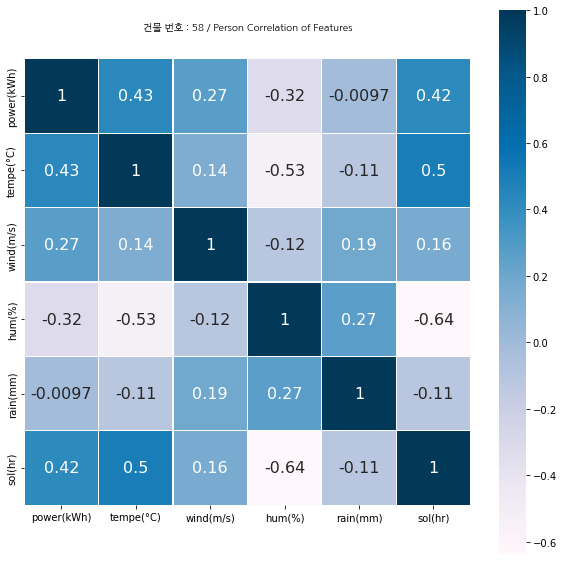

In [29]:
Corr_cluster(cluster_1)

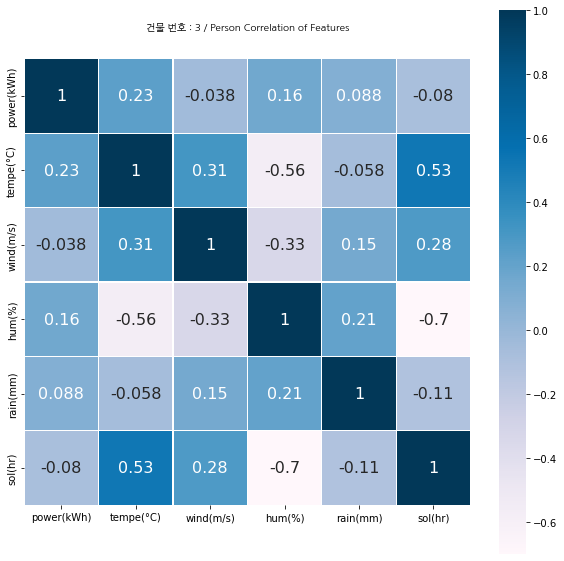

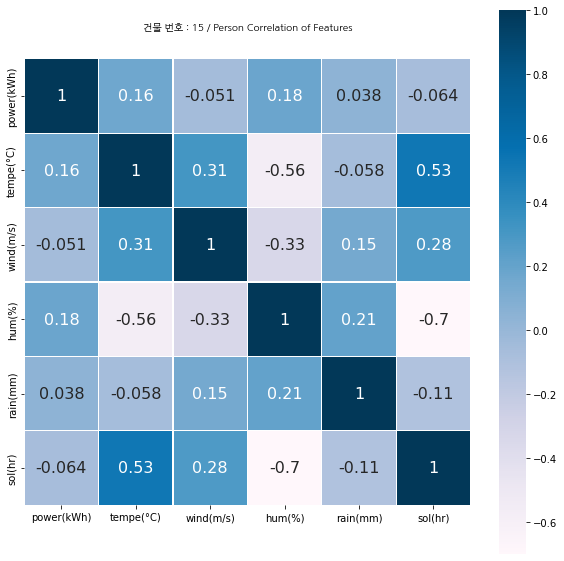

In [30]:
Corr_cluster(cluster_2)

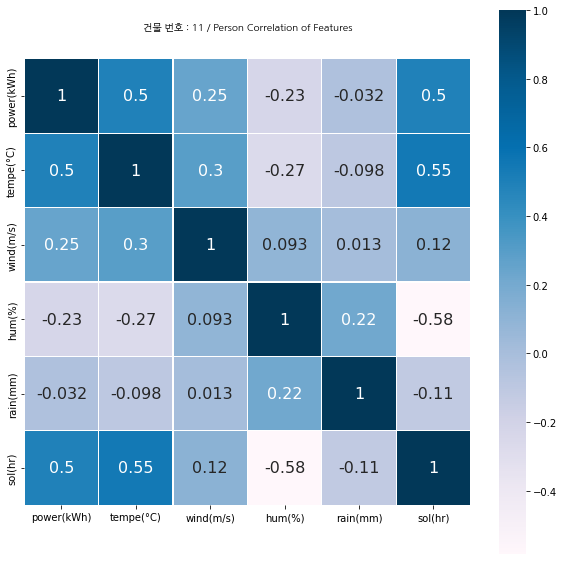

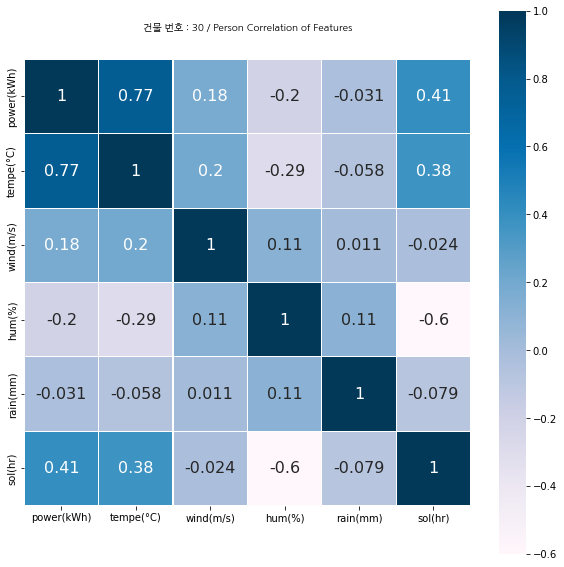

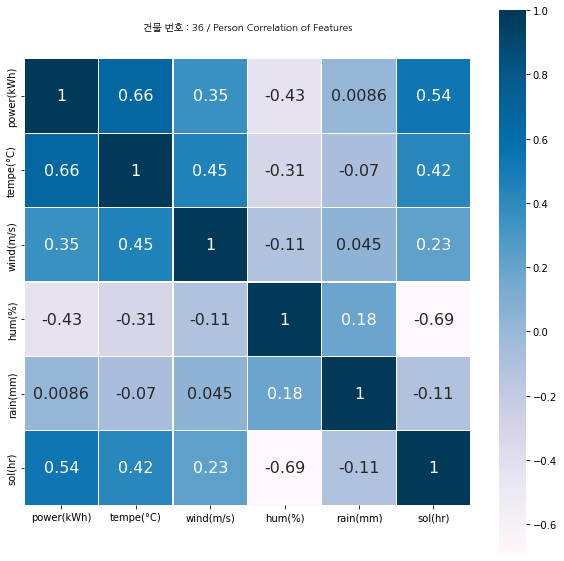

In [31]:
Corr_cluster(cluster_3)